In [1]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
from afqinsight import AFQDataset
from afqinsight.nn.utils import prep_pytorch_data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.distributions.normal import Normal
from sklearn.decomposition import PCA
import afqinsight.augmentation as aug
import pandas as pd
import seaborn as sns
from afqinsight.nn.pt_models import VariationalAutoencoder



In [2]:
# FIRST TRACT DATASET
# NON VARIATIONAL 
# FC
# TESTING LATENT

In [3]:
import sys 
sys.path.insert(1, '/Users/samchou/AFQ-Insight-Autoencoder-Experiments/AFQ-Insight-Autoencoder-Experiments/Experiment_Utils')
from utils import train_variational_autoencoder, train_autoencoder, select_device, prep_pytorch_data, prep_first_tract_data
from models import Conv1DVariationalAutoencoder_fa

In [4]:
device = select_device()

Using device: mps

Using MPS backend on macOS. (Detailed memory info may not be available.)


In [5]:
dataset = AFQDataset.from_study('hbn')
torch_dataset, train_loader, test_loader, val_loader = prep_pytorch_data(dataset,batch_size=64)  
gt_shape = torch_dataset[0][1].size()[0]
sequence_length = torch_dataset[0][0].size()[0]  # 48
in_channels = torch_dataset[0][0].size()[1]  # 100


File /Users/samchou/.cache/afq-insight/hbn/subjects.tsv exists.
File /Users/samchou/.cache/afq-insight/hbn/nodes.csv exists.


/Users/samchou/src/nrdg/AFQ-Insight/afqinsight/transform.py:144: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  features = interpolated.stack(["subjectID", "tractID", "metric"]).unstack(


In [6]:
torch_dataset, first_tract_train_loader, first_tract_test_loader, first_tract_val_loader = prep_first_tract_data(
    dataset, batch_size=64
)

In [7]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(
        test_model,                    
        first_tract_train_loader,
        first_tract_val_loader,
        epochs=10,
        lr=1e-3,
        device=device,                  
        mixed_precision = (device.type == "cuda")
    )
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.3186 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4430, Val RMSE: 0.3186, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 20.0971, Recon (Val): 10.1509
Saving best model state with RMSE: 0.1341 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.2280, Val RMSE: 0.1341, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 5.4902, Recon (Val): 1.7985
Saving best model state with RMSE: 0.0572 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.0853, Val RMSE: 0.0572, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 0.7848, Recon (Val): 0.3271
Saving best model state with RMSE: 0.0474 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0490, Val RMSE: 0.0474, K

In [8]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(
        test_model,                    
        first_tract_train_loader,
        first_tract_val_loader,
        epochs=10,
        lr=1e-3,
        device=device,                  
        mixed_precision = (device.type == "cuda")
    )
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.3381 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4466, Val RMSE: 0.3381, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 20.3363, Recon (Val): 11.4321
Saving best model state with RMSE: 0.1615 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.2516, Val RMSE: 0.1615, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 6.5968, Recon (Val): 2.6087
Saving best model state with RMSE: 0.0600 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.1035, Val RMSE: 0.0600, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 1.1575, Recon (Val): 0.3609
Saving best model state with RMSE: 0.0453 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0490, Val RMSE: 0.0453, K

In [9]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(
        test_model,                    
        first_tract_train_loader,
        first_tract_val_loader,
        epochs=10,
        lr=1e-3,
        device=device,                  
        mixed_precision = (device.type == "cuda")
    )
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.3172 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4275, Val RMSE: 0.3172, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 18.6099, Recon (Val): 10.0605
Saving best model state with RMSE: 0.1235 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.2244, Val RMSE: 0.1235, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 5.3454, Recon (Val): 1.5286
Saving best model state with RMSE: 0.0566 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.0827, Val RMSE: 0.0566, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 0.7282, Recon (Val): 0.3202
Saving best model state with RMSE: 0.0451 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0477, Val RMSE: 0.0451, K

In [10]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(test_model, first_tract_train_loader, 
                                                        first_tract_val_loader, 10, 0.001, device = device)
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.2795 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4011, Val RMSE: 0.2795, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 16.5804, Recon (Val): 7.8124
Saving best model state with RMSE: 0.1208 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.1992, Val RMSE: 0.1208, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 4.1927, Recon (Val): 1.4590
Saving best model state with RMSE: 0.0551 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.0819, Val RMSE: 0.0551, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 0.7122, Recon (Val): 0.3040
Saving best model state with RMSE: 0.0470 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0478, Val RMSE: 0.0470, KL

In [11]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(test_model, first_tract_train_loader, 
                                                        first_tract_val_loader, 10, 0.001, device = device)
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.2756 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4237, Val RMSE: 0.2756, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 18.6126, Recon (Val): 7.5995
Saving best model state with RMSE: 0.0996 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.1747, Val RMSE: 0.0996, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 3.3315, Recon (Val): 0.9922
Saving best model state with RMSE: 0.0521 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.0688, Val RMSE: 0.0521, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 0.4916, Recon (Val): 0.2723
Saving best model state with RMSE: 0.0437 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0444, Val RMSE: 0.0437, KL

In [12]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(test_model, first_tract_train_loader, 
                                                        first_tract_val_loader, 10, 0.001, device = device)
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.3305 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4319, Val RMSE: 0.3305, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 18.9435, Recon (Val): 10.9237
Saving best model state with RMSE: 0.1542 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.2454, Val RMSE: 0.1542, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 6.2858, Recon (Val): 2.3776
Saving best model state with RMSE: 0.0613 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.1011, Val RMSE: 0.0613, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 1.1014, Recon (Val): 0.3758
Saving best model state with RMSE: 0.0479 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0517, Val RMSE: 0.0479, K

In [13]:
latent_dims = [2, 4, 8, 16, 32, 64, 100]
dropout_values = [0.0, 0.1, 0.5]
models = {}
results = {}


for latent_dim in latent_dims:
    print(f"Training Autoencoder with Latent Dimension: {latent_dim}")
    
    # Initialize a new autoencoder for each latent dimension
    test_model = VariationalAutoencoder(input_shape= 100, latent_dims=latent_dim, dropout=0.0).to(device)
    
    # Train the model 
    training_results = train_variational_autoencoder(test_model, first_tract_train_loader, 
                                                        first_tract_val_loader, 10, 0.001, device = device)
    
    # Store both the model and results
    models[latent_dim] = test_model
    results[latent_dim] = training_results
    
    print(f"Completed training for latent_dim={latent_dim}, Best Val RMSE: {training_results['best_val_rmse']:.4f}")


Training Autoencoder with Latent Dimension: 2
Saving best model state with RMSE: 0.3099 at epoch 1
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 1, KL Weight: 0.000000, Train RMSE: 0.4205, Val RMSE: 0.3099, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 18.0681, Recon (Val): 9.6077
Saving best model state with RMSE: 0.1328 at epoch 2
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 2, KL Weight: 0.000000, Train RMSE: 0.2271, Val RMSE: 0.1328, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 5.4165, Recon (Val): 1.7670
Saving best model state with RMSE: 0.0617 at epoch 3
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 3, KL Weight: 0.000000, Train RMSE: 0.0850, Val RMSE: 0.0617, KL (Train): 0.0000, KL (Val): 0.0000, Recon (Train): 0.7629, Recon (Val): 0.3810
Saving best model state with RMSE: 0.0492 at epoch 4
Best model saved to: best_vae_model_ldunknown_dr0.0.pth
Epoch 4, KL Weight: 0.000000, Train RMSE: 0.0515, Val RMSE: 0.0492, KL

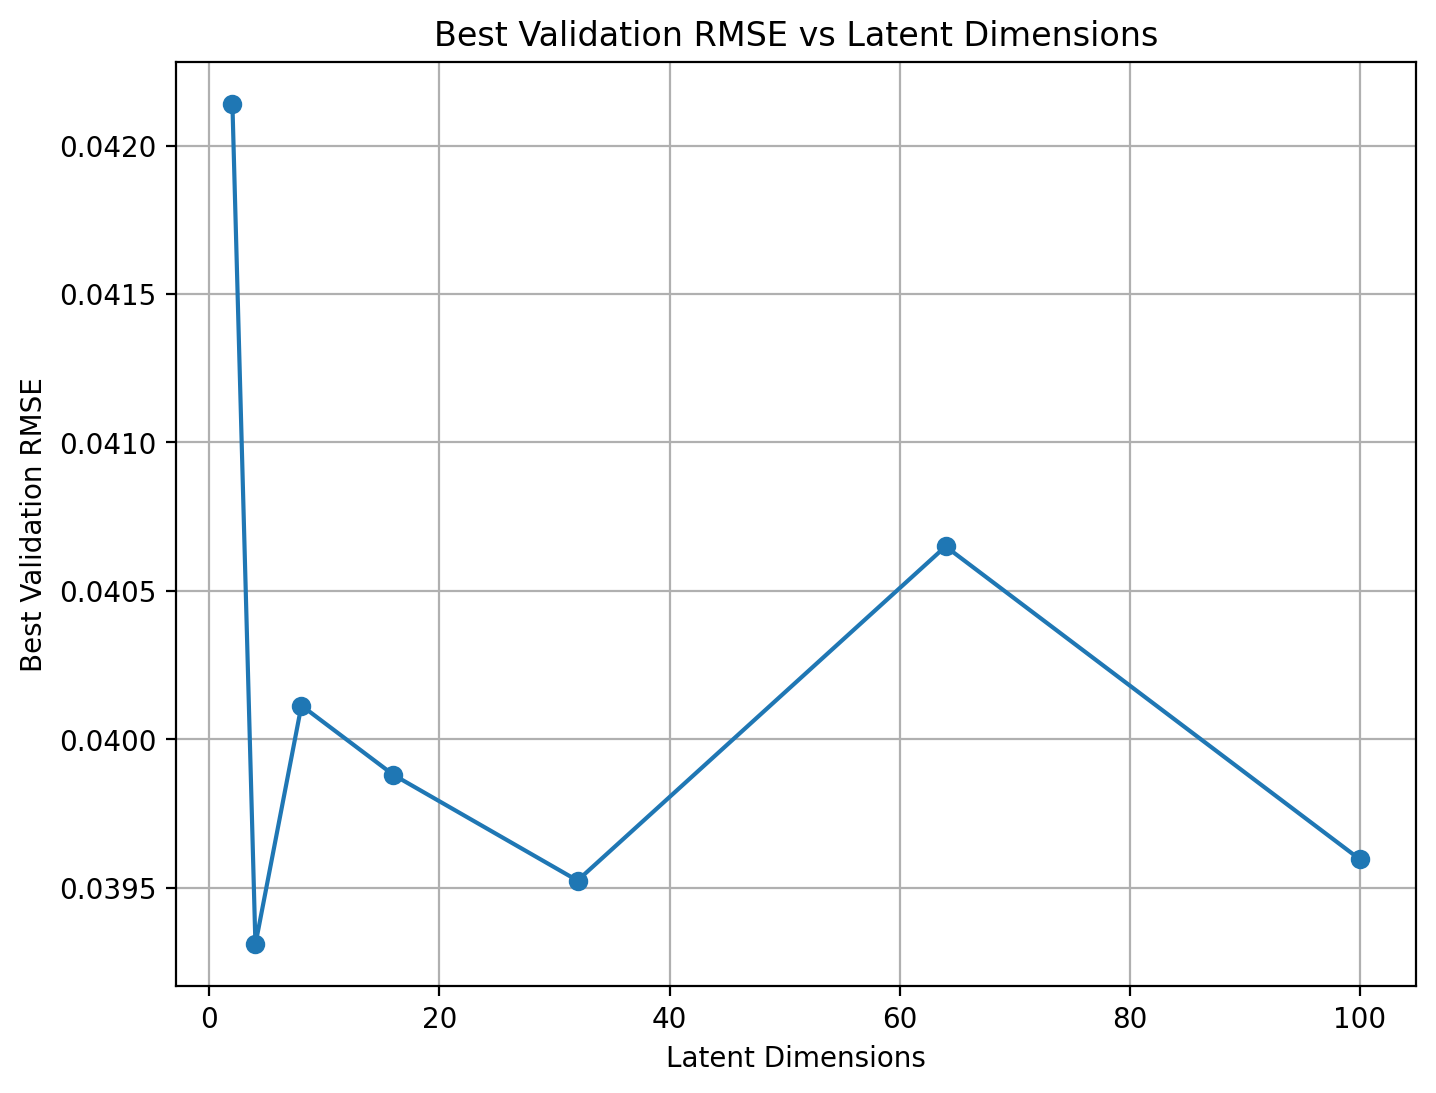

In [14]:
# Extract the latent dimensions and corresponding best validation RMSE values.
latent_dims_list = sorted(results.keys())
best_val_rmse = [results[dim]["best_val_rmse"] for dim in latent_dims_list]

plt.figure(figsize=(8, 6))
plt.plot(latent_dims_list, best_val_rmse, marker='o', linestyle='-')
plt.xlabel("Latent Dimensions")
plt.ylabel("Best Validation RMSE")
plt.title("Best Validation RMSE vs Latent Dimensions")
plt.grid(True)
plt.show()


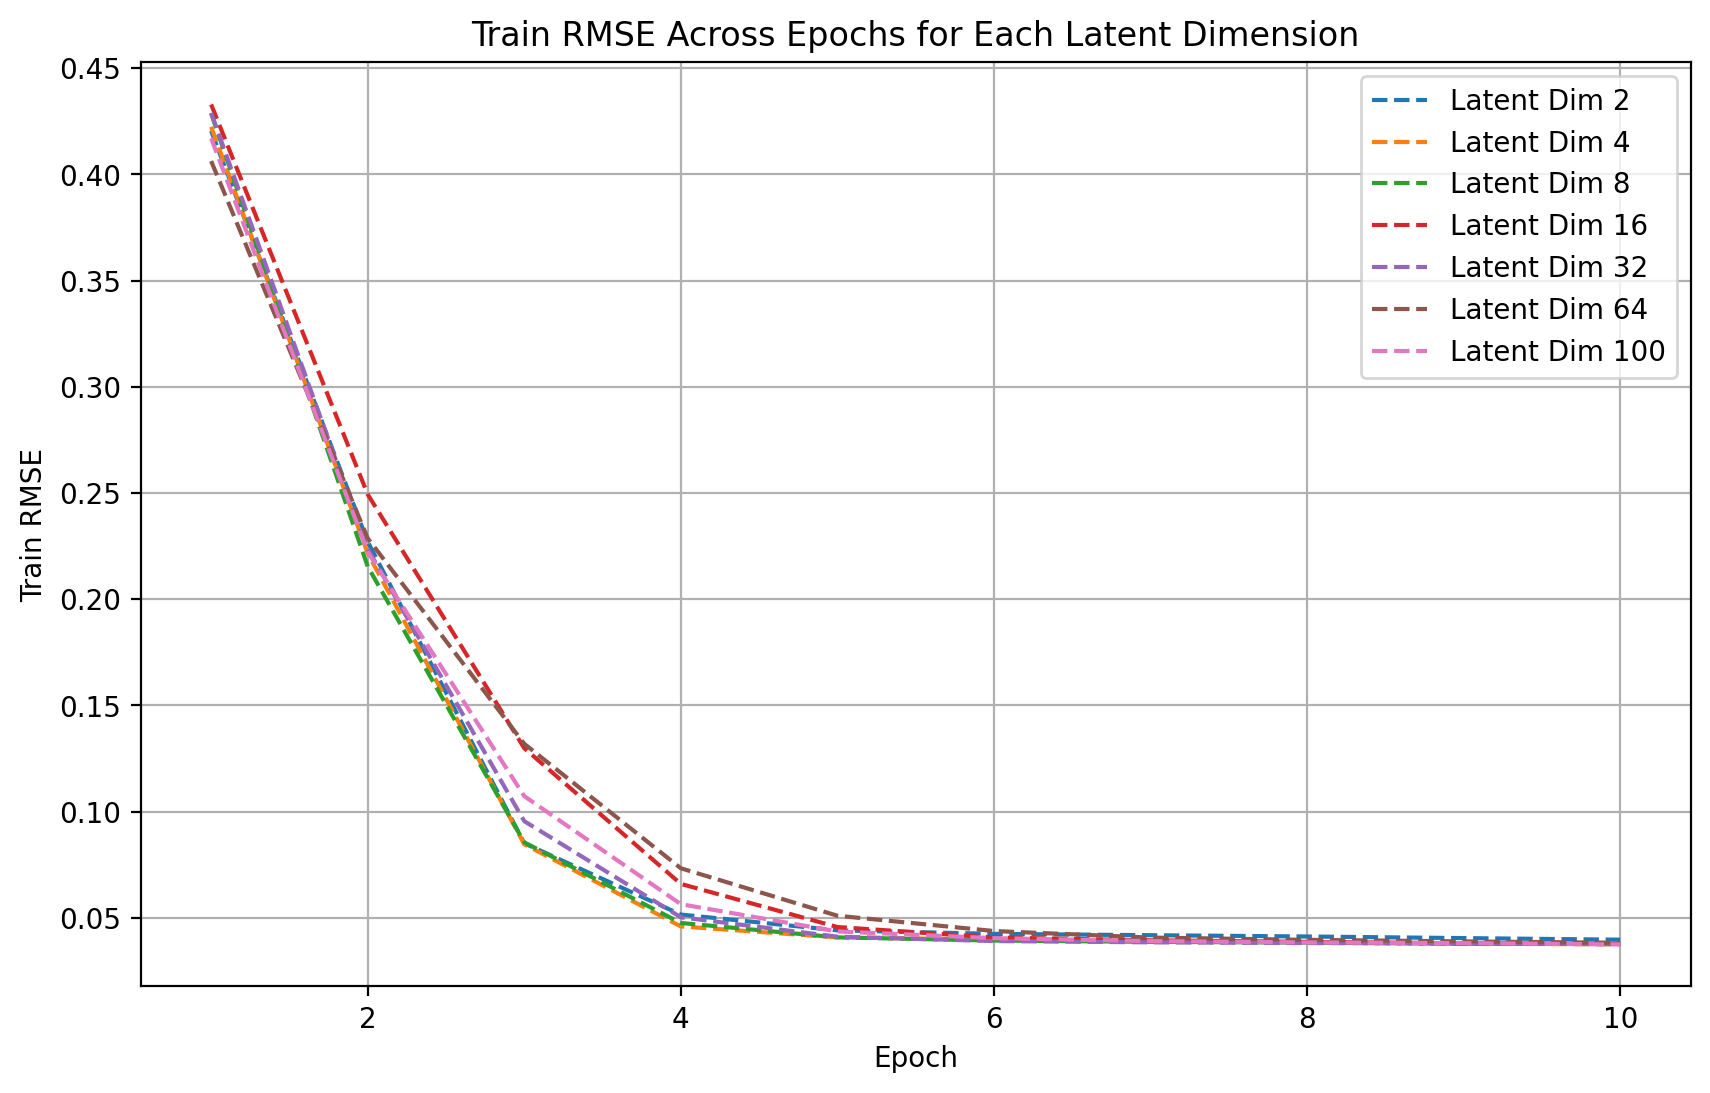

In [15]:
plt.figure(figsize=(10, 6))

# Loop through each latent dimension in your results dictionary
for latent_dim, training_results in results.items():
    train_rmse = training_results["train_rmse_per_epoch"]
    epochs = range(1, len(train_rmse) + 1)
    plt.plot(epochs, train_rmse, linestyle='--', label=f"Latent Dim {latent_dim}")

plt.xlabel("Epoch")
plt.ylabel("Train RMSE")
plt.title("Train RMSE Across Epochs for Each Latent Dimension")
plt.legend()
plt.grid(True)
plt.show()


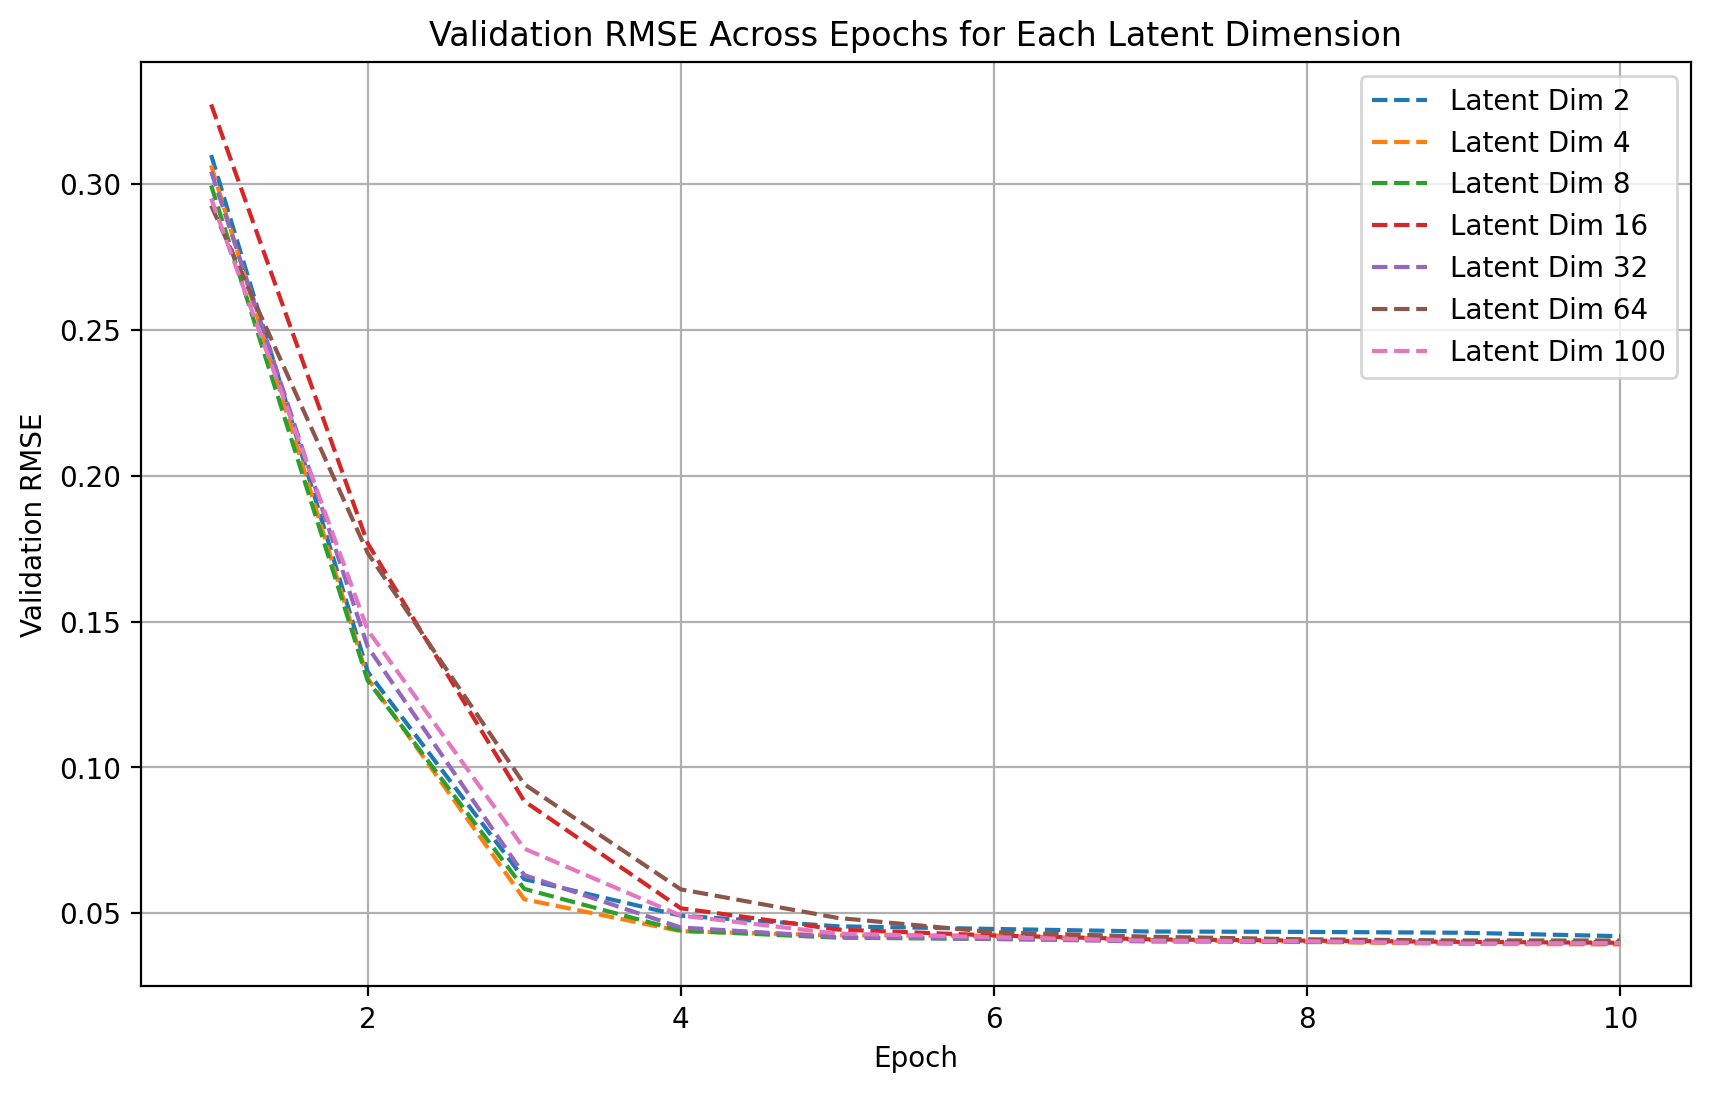

In [16]:
plt.figure(figsize=(10, 6))

# Loop through each latent dimension's results and plot the validation RMSE across epochs.
for latent_dim, training_results in results.items():
    val_rmse = training_results["val_rmse_per_epoch"]
    epochs = range(1, len(val_rmse) + 1)
    plt.plot(epochs, val_rmse, linestyle='--', label=f"Latent Dim {latent_dim}")

plt.xlabel("Epoch")
plt.ylabel("Validation RMSE")
plt.title("Validation RMSE Across Epochs for Each Latent Dimension")
plt.legend()
plt.grid(True)
plt.show()

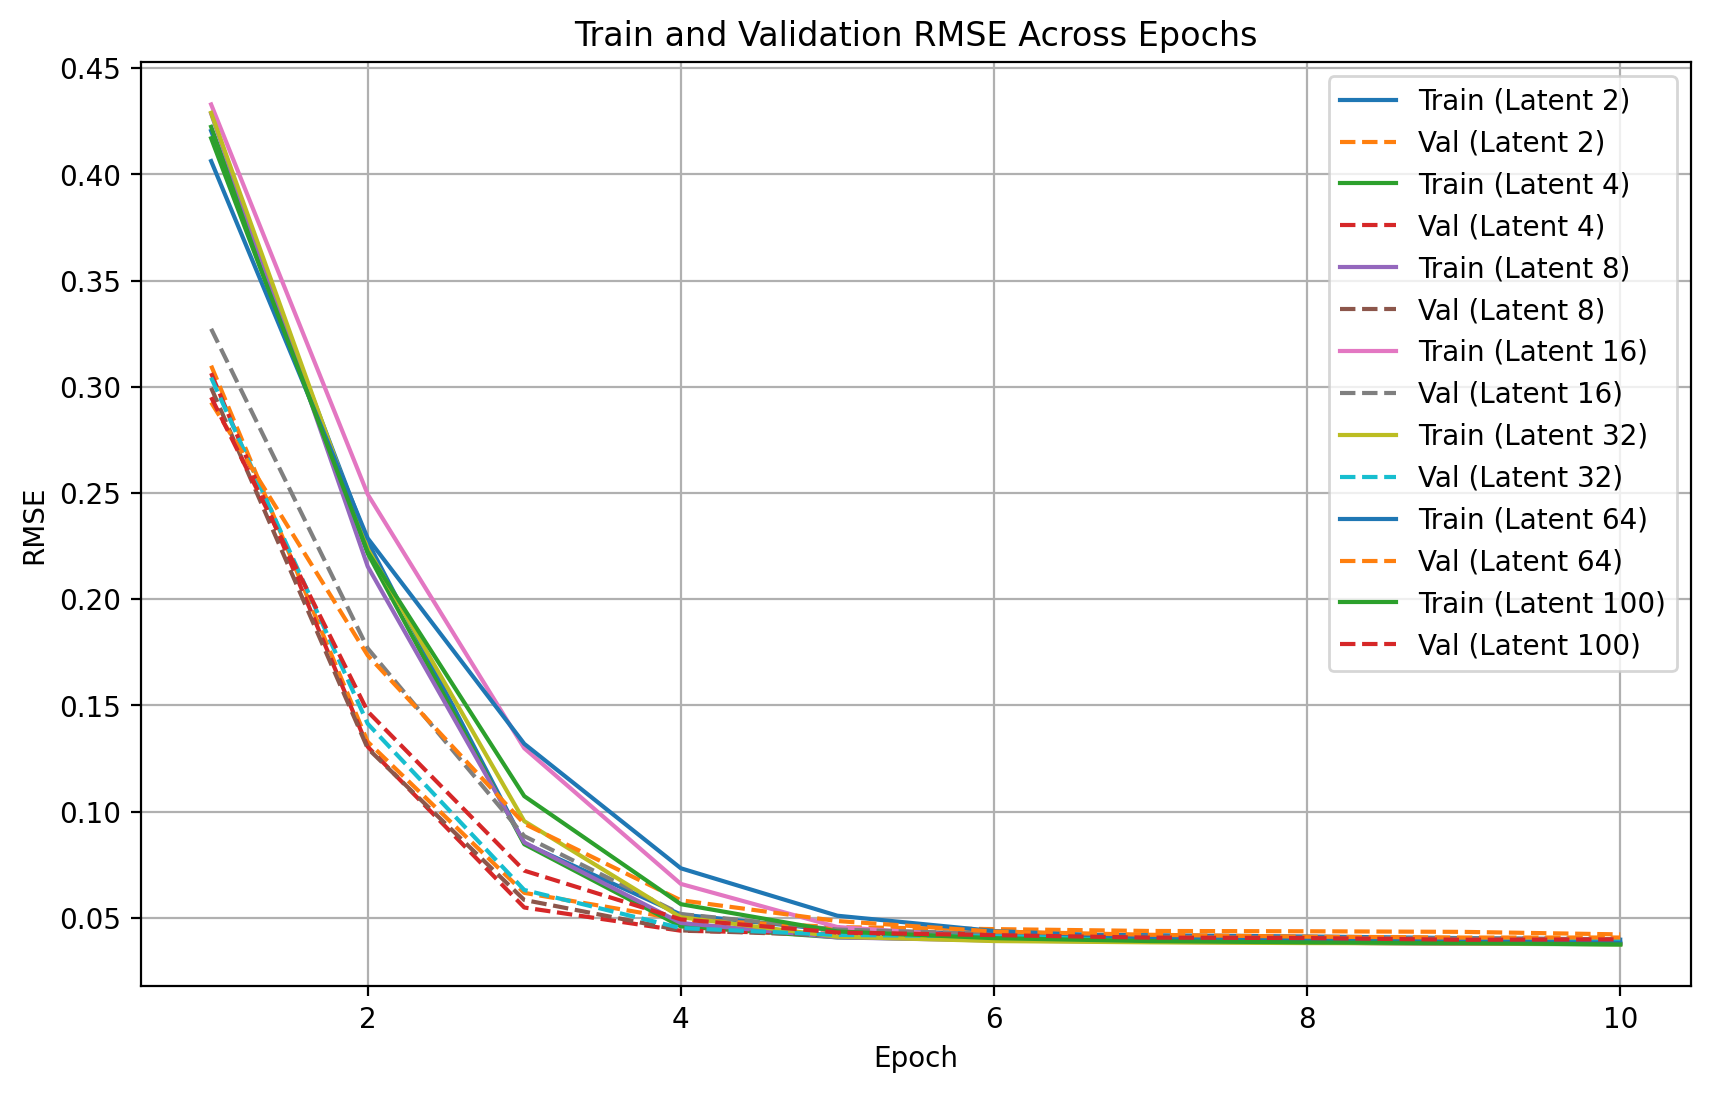

In [17]:
plt.figure(figsize=(10, 6))

# Loop through each latent dimension's results
for latent_dim, training_results in results.items():
    epochs = range(1, len(training_results["train_rmse_per_epoch"]) + 1)
    train_rmse = training_results["train_rmse_per_epoch"]
    val_rmse = training_results["val_rmse_per_epoch"]
    
    plt.plot(epochs, train_rmse, linestyle='-', label=f"Train (Latent {latent_dim})")
    plt.plot(epochs, val_rmse,linestyle='--', label=f"Val (Latent {latent_dim})")

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("Train and Validation RMSE Across Epochs")
plt.legend()
plt.grid(True)
plt.show()

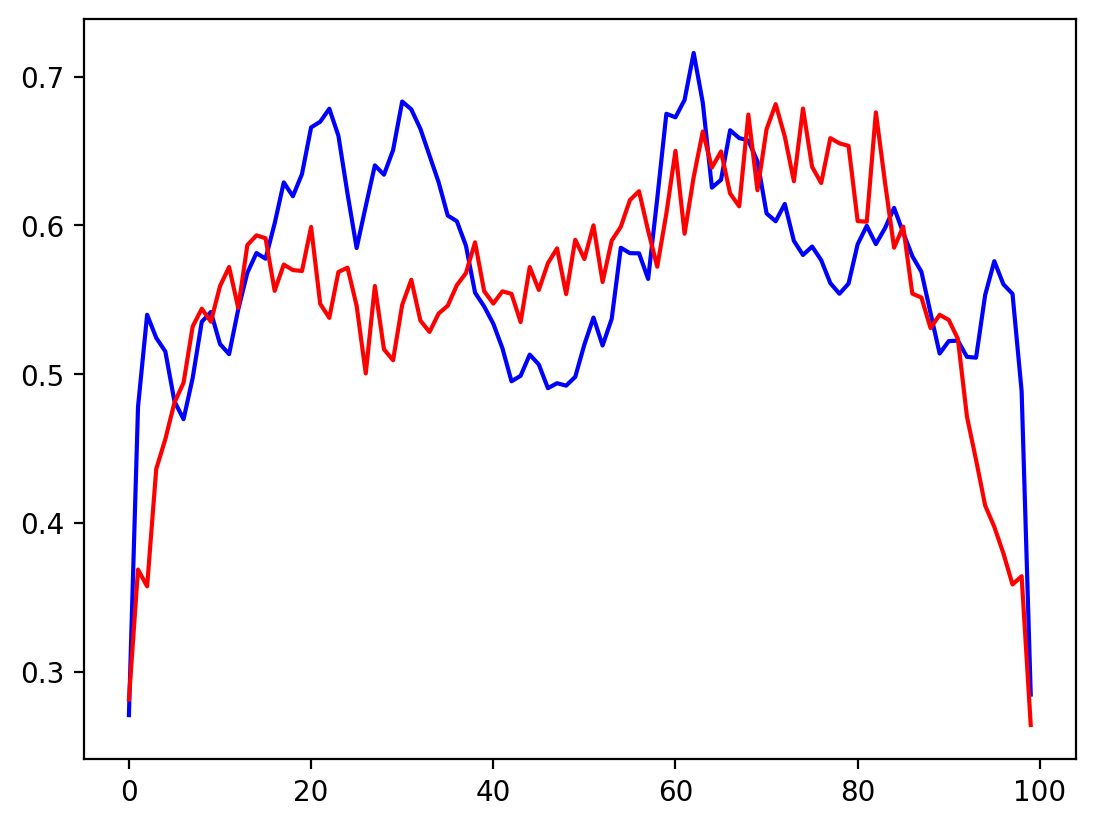

In [18]:
#selecting the model with 64 latent dimensions, 0.1 dropout
sample = first_tract_test_loader.dataset[0][0][0:1].unsqueeze(0).to(device)
output = models[16](sample)

# Assuming the first element of the tuple is the reconstruction:
reconstructed = output[0]

orig = sample.cpu().detach().numpy()
recon = reconstructed.cpu().detach().numpy()

plt.plot(orig.flatten()[0:100], color='blue', label='Original')
plt.plot(recon.flatten()[0:100], color='red', label='Reconstructed')